In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 
from scipy.stats import skew
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.loc[:,"SalePrice"].mean()

180921.19589041095

In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [6]:
print(train.shape[0])
print(test.shape[0])

1460
1459


In [7]:
all = pd.concat([train, test],axis=0,join='inner').reset_index(drop = True)

In [8]:
# all

In [9]:
all.head().shape

(5, 80)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


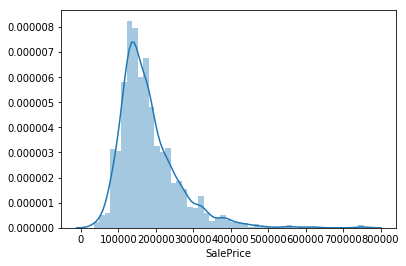

In [10]:
sns.distplot(train['SalePrice'])

In [11]:
train.loc[:,"SalePrice"].median()

163000.0

In [12]:
# all_na = (all.isnull().sum() / len(all)) * 100
# # all_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30] 
# missing_data = pd.DataFrame({'Missing Ratio' :all_na})
# missing_data.head(20)

In [13]:
all = all.drop(['Id'],axis=1)

In [14]:
all=all.drop(['BsmtFullBath', 'BsmtHalfBath', 'HalfBath','LowQualFinSF'],axis=1)

In [15]:
all["TotalSF"] = all["TotalBsmtSF"] + all["1stFlrSF"] + all["2ndFlrSF"] 
all["TotalQual"]=all["TotalSF"] *all['OverallQual']
# all["TotalBsmtSFQual"]=all["TotalBsmtSF"] *all['BsmtQual']
all['YearBuilt'][all['YearBuilt']!=all['YearRemodAdd']]=all['YearRemodAdd']
all['YearBuilt'] = 2011 - all['YearBuilt']
all['YearRemodAdd']= 2011- all['YearRemodAdd']

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
all.dtypes[all.dtypes != "object"].index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'TotalQual'],
      dtype='object')

In [17]:
all["LotFrontage"] = all.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [18]:
# # all.loc[:,all.isnull().sum()>0].isnull().sum().sort_values(ascending=False).index

# all.loc[:,['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
#        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
#        'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
#        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#        'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'TotalQual']].isnull().sum().sort_values(ascending=False)

In [19]:
# all.loc[:,['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
#        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
#        'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
#        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#        'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'TotalQual']]=all.fillna(all.mean())

In [20]:
# # all.loc[:,all.isnull().sum()>0].isnull().sum().sort_values(ascending=False).index

# all.loc[:,['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
#        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
#        'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
#        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#        'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'TotalQual']].isnull().sum().sort_values(ascending=False)

In [21]:
#数値型の特徴量の歪度を計算
# all.dtypes[all.dtypes != "object"].index
# skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
 

In [22]:
# all.loc[:,['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]

In [23]:
# all=all.drop(['BsmtFullBath', 'BsmtHalfBath', 'HalfBath','LowQualFinSF'],axis=1)

In [24]:
all = all.drop(['Utilities'], axis=1)

In [25]:
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional'):
     all[col] =all[col].fillna(all[col].mode()[0])

In [26]:
# all.loc[:,['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
#        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
#        'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
#        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#        'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'TotalQual']]=np.log(all.loc[:,['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
#        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
#        'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
#        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
# #        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
#        'MiscVal', 'MoSold', 'YrSold', 'TotalSF', 'TotalQual']])

In [27]:
# numeric_feats

In [28]:
for columns in ("PoolQC", "MiscFeature", 'GarageType',"Alley", "Fence", "FireplaceQu", "MSSubClass", 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all[columns] = all[columns].fillna('None')
for columns in ('GarageArea', 'GarageYrBlt', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', "MasVnrArea", ):
    all[columns] = all[columns].fillna(0)

In [29]:
# all.loc[:,['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']]=="None"
zerone = lambda x: 0 if x =="None"  else 1
all.loc[:,['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']]=all.loc[:,['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']].applymap(zerone)


In [30]:
# all.loc[:,['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']]

In [31]:
all.loc[:,['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']]
# all.head()

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,1,0,1,0
6,0,0,0,0,1
7,0,1,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


In [32]:
from sklearn.preprocessing import LabelEncoder

#以下の特徴量は順序特徴量とみなせる
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street',  'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

#マッピングを実行
for col in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all[col].values)) 
    all[col] = lbl.transform(list(all[col].values)) 

In [33]:
# all.head()
# all.loc[:,['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']]

In [34]:
# all.dtypes=="object"
# all = pd.get_dummies(all)

In [35]:
# (all.dtypes=="object").sum()

In [36]:
all.loc[:,all.isnull().sum()>0].isnull().sum().sort_values(ascending=False)

TotalQual    1
TotalSF      1
dtype: int64

In [37]:
y=train.loc[:,"SalePrice"]
# all = np.log1p(all)
# y = np.log1p(y)

In [38]:
all[(np.isnan(all)) | (all==float("inf")) | (all==float("-inf"))] = 0.0

In [39]:
# all

In [40]:
all.loc[:,all.isnull().sum()>0].isnull().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [41]:
X=all.iloc[:1460]

y=train.loc[:,"SalePrice"]
X = np.log1p(X)
y = np.log1p(y)
# X_test=
# X_train.head()
# all.loc[:,all.isnull().sum()>0].isnull().sum().sort_values(ascending=False).index
# print(X.shape)
# print(y.shape)
# X.loc[:,X.isnull().sum()>0].isnull().sum().sort_values(ascending=False)
# X.columns[np.isnan(X).any()]

In [42]:
rf_X_train, rf_X_test, rf_y_train, rf_y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# las = Lasso(alpha=0.0005)
# las.fit(X_train, y_train)
# print("ラッソ回帰でのRMSE：",np.sqrt(mean_squared_error(las.predict(X_test), y_test)))

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=80, max_features='auto')
rf.fit(rf_X_train, rf_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
# ranking = np.argsort(-rf.feature_importances_)
# f, ax = plt.subplots(figsize=(30, 30))
# sns.barplot(x=rf.feature_importances_[ranking], y=rf_X_train.columns.values[ranking], orient='h')
# ax.set_xlabel("important")
# plt.tight_layout()

In [45]:
# rf_X_train.iloc[:,ranking[:20]].columns

In [46]:
X_ = all.loc[:,['TotalQual', 'CentralAir', 'BsmtUnfSF', 'GarageArea', 'GarageYrBlt',
       'LotArea', 'MSZoning_RM', 'GrLivArea', '1stFlrSF', 'LotFrontage',
       'YearBuilt', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'TotalSF',
       'TotalBsmtSF', '2ndFlrSF', 'MoSold', 'KitchenQual', 'OpenPorchSF']]

In [47]:
X_y = pd.concat([X_,y], axis =1)

In [48]:
# plt.figure(figsize=(12, 12))
# sns.heatmap(X_y.corr(), annot=True, square=True, fmt='.2f')
# plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.3, random_state = 0)
las = Lasso(alpha=0.001)
las.fit(X_train, y_train)
print("ラッソ回帰でのRMSE：",np.sqrt(mean_squared_error(las.predict(X_test), y_test)))

ValueError: Found input variables with inconsistent numbers of samples: [2919, 1460]